In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-07-16 17:38:30--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  23.9MB/s    in 7.3s    

2023-07-16 17:38:37 (19.7 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
#unzipping file

import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
#defining the horse and human directory

import os

train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')


In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse02-5.png', 'horse26-6.png', 'horse11-8.png', 'horse30-6.png', 'horse32-6.png', 'horse34-9.png', 'horse40-4.png', 'horse18-8.png', 'horse39-3.png', 'horse14-6.png']
['human05-12.png', 'human16-03.png', 'human04-30.png', 'human08-04.png', 'human01-03.png', 'human04-11.png', 'human14-30.png', 'human06-25.png', 'human13-08.png', 'human09-26.png']


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

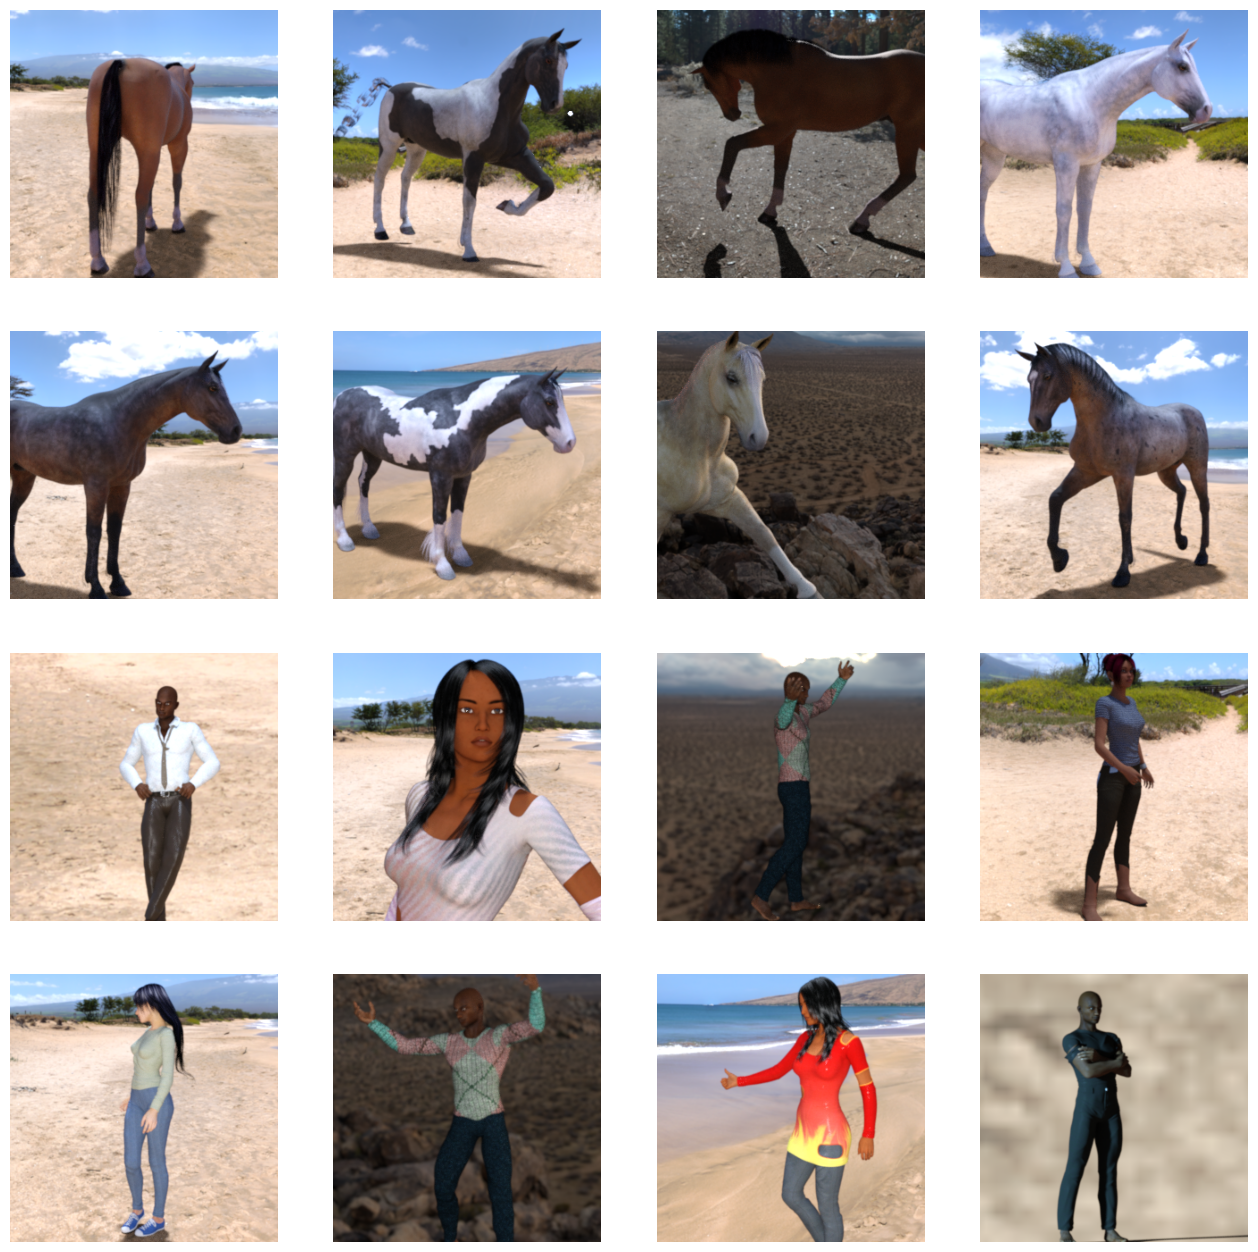

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


##Building the model

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

##Data Preprocessing
using the ImageDataGenerator class from tf

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


##Training

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1
                    )

Epoch 1/15
8/8 [==============================] - 22s 754ms/step - loss: 0.8357 - accuracy: 0.4983
Epoch 2/15
8/8 [==============================] - 6s 766ms/step - loss: 0.6899 - accuracy: 0.6485
Epoch 3/15
8/8 [==============================] - 7s 879ms/step - loss: 0.6855 - accuracy: 0.5951
Epoch 4/15
8/8 [==============================] - 7s 888ms/step - loss: 0.6644 - accuracy: 0.5651
Epoch 5/15
8/8 [==============================] - 7s 945ms/step - loss: 1.4230 - accuracy: 0.7553
Epoch 6/15
8/8 [==============================] - 7s 793ms/step - loss: 0.5446 - accuracy: 0.7820
Epoch 7/15
8/8 [==============================] - 7s 865ms/step - loss: 0.3555 - accuracy: 0.8420
Epoch 8/15
8/8 [==============================] - 7s 781ms/step - loss: 0.5101 - accuracy: 0.8732
Epoch 9/15
8/8 [==============================] - 7s 779ms/step - loss: 0.2306 - accuracy: 0.8966
Epoch 10/15
8/8 [==============================] - 7s 777ms/step - loss: 0.1257 - accuracy: 0.9488
Epoch 11/15
8/8 [=

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving download.jpeg to download.jpeg
1/1 [==============================] - 0s 323ms/step
[0.13308194]
download.jpeg is a horse
